# Analyse des Bedarfs laut Verkehrswegeplanung

Basis: 

- Straße: Fernstraßenausbaugesetz in der Fassung der Bekanntmachung vom 20. Januar 2005 (BGBl. I S. 201), das zuletzt durch Artikel 1 des Gesetzes vom 23. Dezember 2016 (BGBl. I S. 3354) geändert worden ist (HTML Import via Excel)
- Schiene: Bundesschienenwegeausbaugesetz vom 15. November 1993 (BGBl. I S. 1874), das zuletzt durch Artikel 1 des Gesetzes vom 23. Dezember 2016 (BGBl. I S. 3221) geändert worden ist (HTML Import via Excel)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Daten einlesen

In [2]:
df = pd.read_excel('Strasse.xlsx')
df.dropna(subset = ['Nr', 'Land'], inplace = True)
df.rename(columns = {'Unnamed: 3': 'Kategorie'}, inplace = True)

## Daten filtern nach Strings

In [3]:
df['Kategorie'] = 'sonstige'
df.loc[df['Strecke'].str.contains('A'), 'Kategorie'] = 'Autobahn'
df.loc[df['Strecke'].str.contains('B'), 'Kategorie'] = 'Bundesstraße'

In [4]:
df['Vorhaben'] = 'sonstige'
df.loc[df['Art'].str.contains('N'), 'Vorhaben'] = 'Neubau'
df.loc[df['Art'].str.contains('E'), 'Vorhaben'] = 'Erweiterung'
df.loc[df['Von'].str.contains('OU'), 'Vorhaben'] = 'Ortsumfahrung'

In [5]:
df['Priorität'] = 'Niedrig'
df.loc[df['Planungsstand'].str.contains('Vordringlicher'), 'Priorität'] = 'Hoch'
df.loc[df['Planungsstand'].str.contains('Laufend'), 'Priorität'] = 'Hoch'

## Plots

In [6]:
sns.set_palette('pastel')
sns.set_context('talk')

### Straße

[Text(0, 0.5, 'Anzahl')]

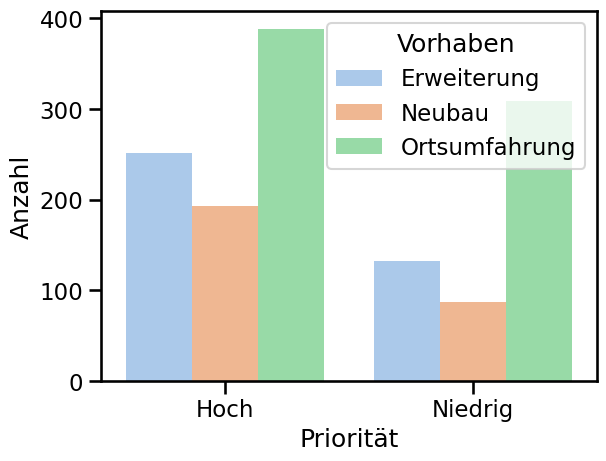

In [7]:
ax = sns.countplot(data = df, x = 'Priorität', hue = 'Vorhaben')
ax.set(ylabel = 'Anzahl')
#ax.get_figure().savefig('PrioritätVorhaben.png', dpi = 600, bbox_inches = 'tight')

[Text(0, 0.5, 'Anzahl')]

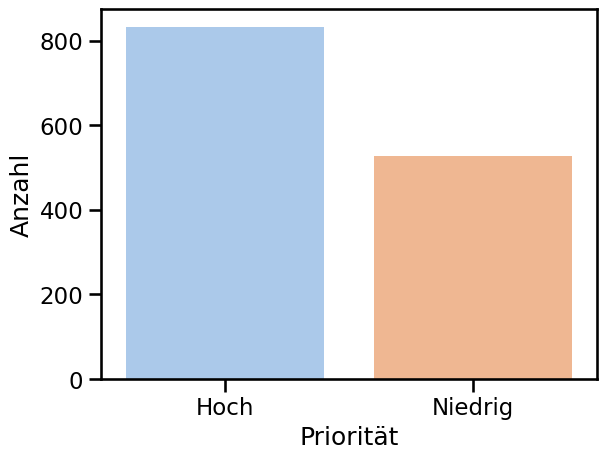

In [8]:
ax = sns.countplot(data = df, x = 'Priorität')
ax.set(ylabel = 'Anzahl')
#ax.get_figure().savefig('Priorität.png', dpi = 600, bbox_inches = 'tight')

[Text(0, 0.5, 'Anzahl')]

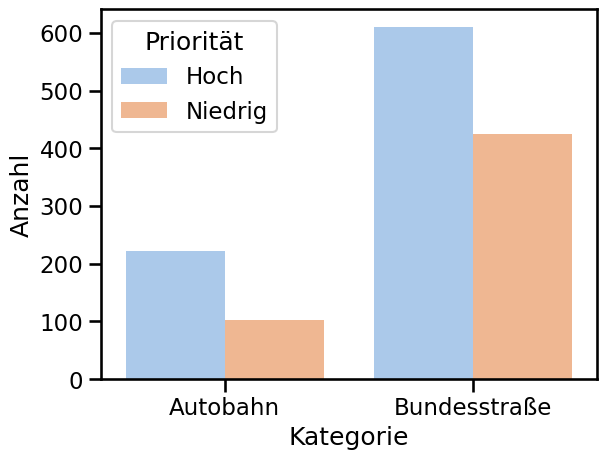

In [9]:
ax = sns.countplot(data = df, hue = 'Priorität', x = 'Kategorie')
ax.set(ylabel = 'Anzahl')
#ax.get_figure().savefig('PrioritätKategorie.png', dpi = 600, bbox_inches = 'tight')

[Text(0, 0.5, 'Anzahl')]

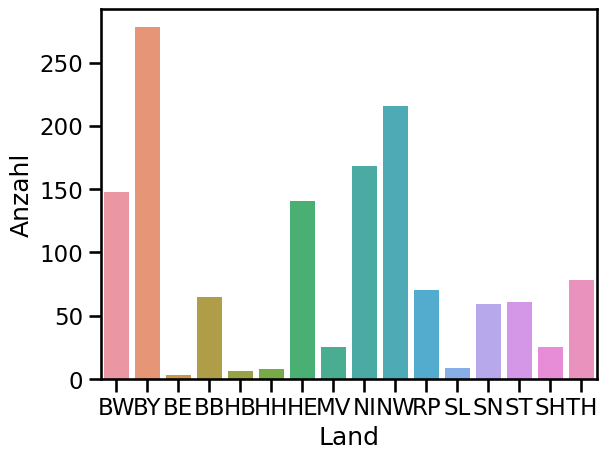

In [10]:
ax = sns.countplot(data = df, x = 'Land')
ax.set(ylabel = 'Anzahl')
#ax.get_figure().savefig('Land.png', dpi = 600, bbox_inches = 'tight')

### Schiene

In [11]:
df2 = pd.read_excel('Schiene.ods')

In [12]:
df2['Priorität'] = 'Niedrig'
df2.loc[df2['Planungsstand'].str.contains('Vordringlich'), 'Priorität'] = 'Hoch'
df2.loc[df2['Planungsstand'].str.contains('Laufend'), 'Priorität'] = 'Hoch'
df2['Vorhaben'] = 'sonstige'
df2.loc[df2['Bezeichnung'].str.contains('ABS'), 'Vorhaben'] = 'Ausbau'
df2.loc[df2['Bezeichnung'].str.contains('NBS'), 'Vorhaben'] = 'Neubau'

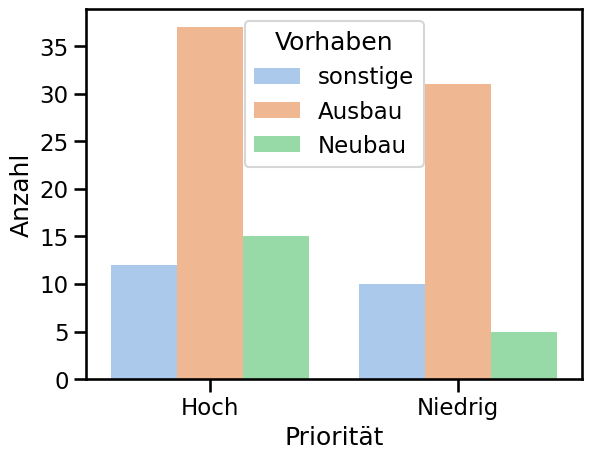

In [13]:
ax = sns.countplot(data = df2, x = 'Priorität', hue = 'Vorhaben')
ax.set(ylabel = 'Anzahl')
ax.get_figure().savefig('PrioritätVorhabenSchiene.png', dpi = 600, bbox_inches = 'tight')

[Text(0, 0.5, 'Anzahl')]

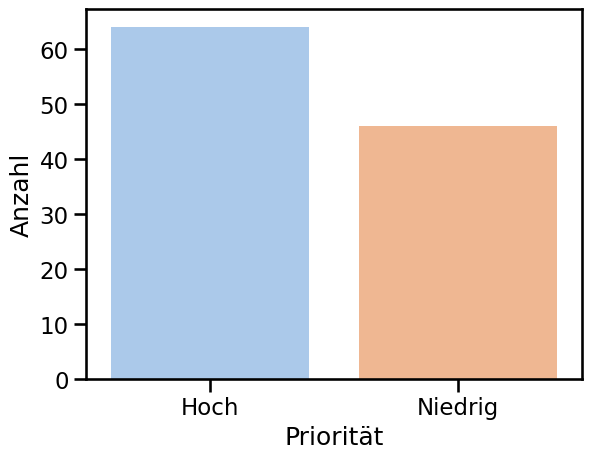

In [14]:
ax = sns.countplot(data = df2, x = 'Priorität')
ax.set(ylabel = 'Anzahl')
#ax.get_figure().savefig('PrioritätSchiene.png', dpi = 600, bbox_inches = 'tight')

## Vergleich Anteil Neubau zu Ausbau

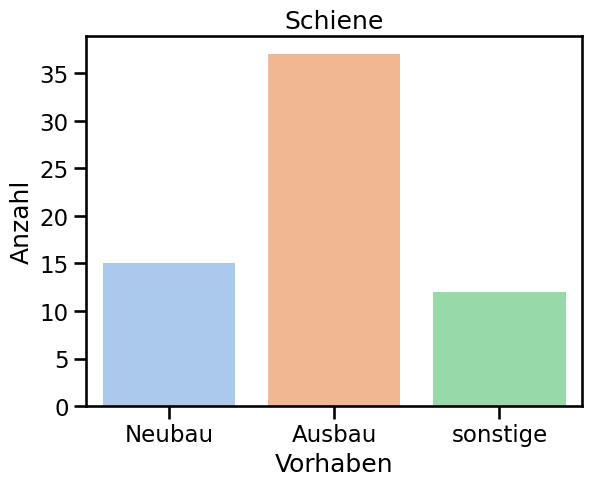

In [15]:
ax = sns.countplot(data = df2[df2['Priorität'] == 'Hoch'], x = 'Vorhaben', order = ['Neubau', 'Ausbau', 'sonstige'])
ax.set(ylabel = 'Anzahl')
ax.set(title = 'Schiene')
ax.get_figure().savefig('VorhabenAnteilSchiene.png', dpi = 600, bbox_inches = 'tight')

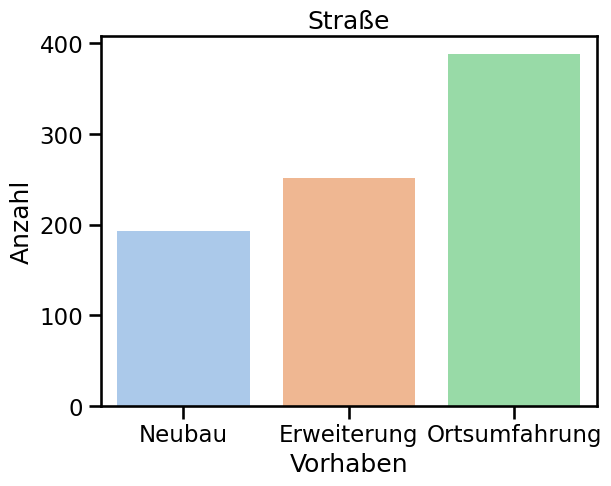

In [16]:
ax = sns.countplot(data = df[df['Priorität'] == 'Hoch'], x = 'Vorhaben', order = ['Neubau', 'Erweiterung', 'Ortsumfahrung'])
ax.set(ylabel = 'Anzahl')
ax.set(title = 'Straße')
ax.get_figure().savefig('VorhabenAnteilStrasse.png', dpi = 600, bbox_inches = 'tight')